The objective of this assignment is to familiarize you with how to fit data, and how to save and load datasets.

In [95]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize

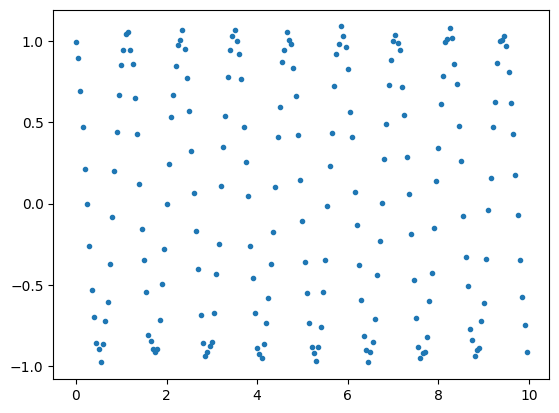

In [96]:
# First. generate some random data that looks roughly like a sine wave

x_data = np.arange(0,10,0.05)
y_data = np.sin(5.3*x_data + 1.9) + 0.1*np.random.rand(len(x_data))

plt.plot(x_data,y_data,'.')

In [97]:
# Now use scipy.optimize.curve_fit to fit it

# first, define a fit function. There are four parameters: cos and sin amplitudes, freuqency, and an offset
def fit_osc(x,A,B,omega,offs):
    p = omega*x
    return A*np.cos(p) + B*np.sin(p) + offs

# then try to fit it. The parameter p0 is the initial guess
# for fits other than straight lines, it needs to be relatively close for the fit to converge
fit,err = scipy.optimize.curve_fit(fit_osc,x_data,y_data,p0=(1,1,5,0))
fit, err

(array([ 0.94485731, -0.3240223 ,  5.2996069 ,  0.05112379]),
 array([[ 1.01990072e-05,  6.75310529e-06,  1.43409133e-06,
         -9.76699081e-08],
        [ 6.75310529e-06,  2.89271509e-05,  4.43861479e-06,
         -2.77975799e-07],
        [ 1.43409133e-06,  4.43861479e-06,  9.38247033e-07,
         -2.50257521e-10],
        [-9.76699081e-08, -2.77975799e-07, -2.50257521e-10,
          3.98929276e-06]]))

Text(0.5, 1.0, 'Fitted frequency: 5.30 +/- 9.7e-04')

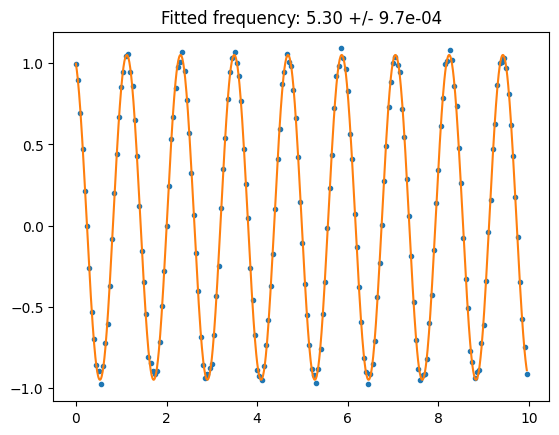

In [98]:
# plot data with fit results
plt.plot(x_data,y_data,'.')

# use more finely spaced points to plot fit curve
x_curve = np.arange(min(x_data),max(x_data),0.01)
plt.plot(x_curve,fit_osc(x_curve,*fit),'-')

# add a label capturing the standard error in the fit parameter
plt.title("Fitted frequency: %.2f +/- %.1e" %(fit[2], np.sqrt(err[2,2])))

# If the fit doesn't look very good, it can be helpful to try to find better parameters by hand
# then run the fit with a better guess

# guess=(1,0,5,0)
# plt.plot(x_curve,fit_osc(x_curve,*guess))

In [99]:
# now save the data and fit parameters for hypothetical future use
np.savez('test.npz',x_data=x_data,y_data=y_data,fit=fit)

In [100]:
# we can reload them
reloaded = np.load('test.npz',allow_pickle=True)

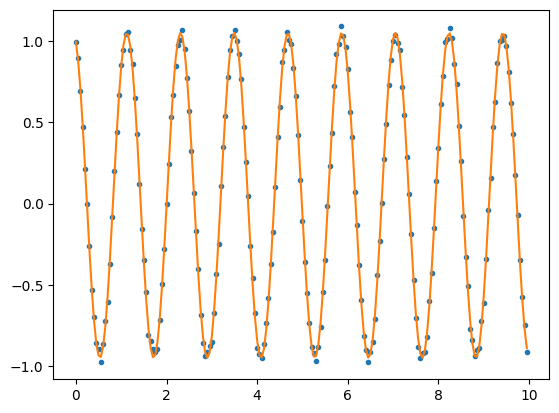

In [101]:
# and check that it is the same
plt.plot(reloaded['x_data'],reloaded['y_data'],'.')
plt.plot(reloaded['x_data'], fit_osc(reloaded['x_data'],*reloaded['fit']))

In [102]:
# now you download the files 'exponential.npz', 'decay.npz' and 'damped_osc.npz' and fit them.

# exponential.npz : exponential decay. Give time constant and uncertainty
# damped_osc : oscillation with expoential decay envelope. Estimate frequency and decay constant, give uncertanties
# decay : decay of the form exp(-t**n/tau) for some n. Give n, tau and uncertainties


In [103]:
data = np.load('exponential.npz')

In [104]:
x_data,y_data = data['x_data'], data['y_data']

# plt.plot(x_data,y_data)
def exp_decay(t, const, A, offs):
    return A*np.exp(-1 * const * t) + offs

fit,err = scipy.optimize.curve_fit(exp_decay,x_data,y_data, p0=(1, 1, 0.01))
fit


array([0.86014458, 1.02530918, 0.03490019])

Decay Constant: 0.86 +/- 2.7e-02


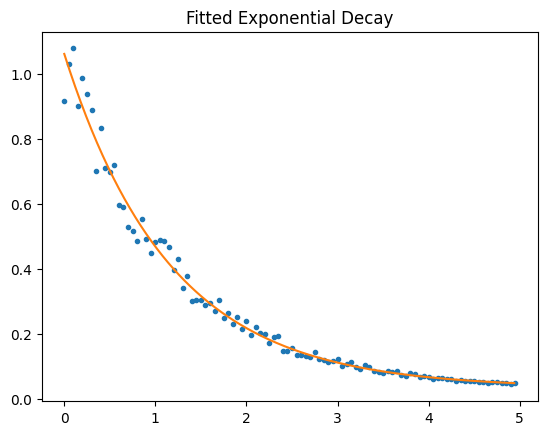

In [105]:
plt.plot(x_data,y_data, '.')

x_curve = np.arange(min(x_data),max(x_data),0.01)
plt.plot(x_curve,exp_decay(x_curve,*fit),'-')

plt.title("Fitted Exponential Decay")
print("Decay Constant: %.2f +/- %.1e" %(fit[0], np.sqrt(err[0,0])))

In [106]:
data = np.load('damped_osc.npz')
x_data, y_data = data['x_data'], data['y_data']

def damped_osc(t, decay, A, B, omega, offs):
    p = t*omega
    return np.exp(-1*decay*t)*(A*np.cos(p) + B*np.sin(p)) + offs

fit,err = scipy.optimize.curve_fit(damped_osc,x_data,y_data, p0 = (200, 1, 1, 0.5,0))
fit

array([ 2.27239332e+02,  9.70536864e-01, -5.47660160e-03, -8.34952579e+03,
        8.13104444e-02])

Omega Value: -8349.53 +/- 1.4e+01
Decay Constant: 227.24 +/- 1.3e+01


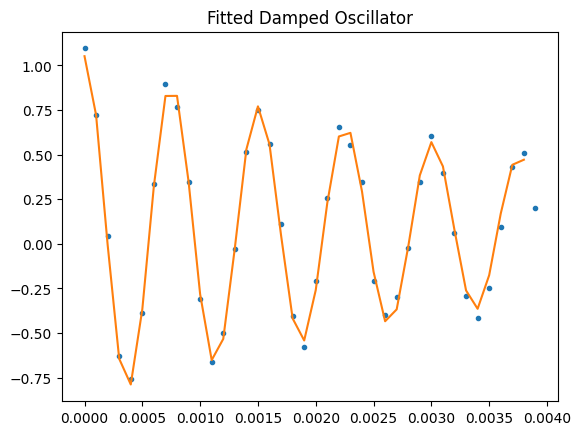

In [107]:
plt.plot(x_data,y_data, '.')

x_curve = np.arange(min(x_data),max(x_data),0.0001)
    
plt.plot(x_curve,damped_osc(x_curve,*fit),'-')
plt.title("Fitted Damped Oscillator")
print("Omega Value: %.2f +/- %.1e" %(fit[3], np.sqrt(err[3,3])))
print("Decay Constant: %.2f +/- %.1e" %(fit[0], np.sqrt(err[0,0])))

# guess = (225, 0.95, -0.005, -8350, 0.08)
# plt.plot(x_curve,damped_osc(x_curve,*guess),'-')

In [108]:
data = np.load('decay.npz')
x_data, y_data = data['x_data'], data['y_data']

def decay(t, A, n, tau, offs):
    return A*np.exp(-t**n/tau) + offs


fit,err = scipy.optimize.curve_fit(decay,x_data,y_data, p0 = (1, 1, 15, 0))
fit


/var/folders/57/15j825g52f9dkn7hff7bjbl40000gn/T/ipykernel_35175/3101306612.py:5: RuntimeWarning: divide by zero encountered in power
  return A*np.exp(-t**n/tau) + offs
/var/folders/57/15j825g52f9dkn7hff7bjbl40000gn/T/ipykernel_35175/3101306612.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-t**n/tau) + offs


array([7.94193095, 4.35367827, 3.26106016, 0.52232443])

n: 4.35 +/- 2.2e-01
tau: 3.26 +/- 2.3e-01


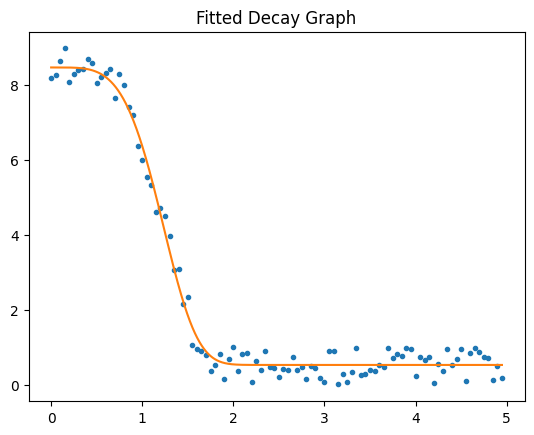

In [109]:
plt.plot(x_data,y_data, '.')

x_curve = np.arange(min(x_data),max(x_data),0.001)

plt.plot(x_curve,decay(x_curve,*fit),'-')

plt.title("Fitted Decay Graph")
print("n: %.2f +/- %.1e" %(fit[1], np.sqrt(err[1,1])))
print("tau: %.2f +/- %.1e" %(fit[2], np.sqrt(err[2,2])))
# guess = (10, 1)
# plt.plot(x_curve,decay(x_curve,*guess),'-')